# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
from api_keys import weather_api_key
from citipy import citipy

In [3]:
city_data = pd.read_csv("../output_data/cities.csv")
city_data.dropna()
city_data

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Set base url and units variables, and combine them to get the base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
base_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_name_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []
date_list =[]

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(base_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
           
        city_name = response_json['name']
        city_name_list.append(city_name)
         
        country_name = response_json['sys']['country']
        country_name_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
        
        #date = response_json['date']
        #date_list.append(date)
    
        print(f"City Name: {city}, City ID: {city_id}, Temperature:{temp},  Humidity:{humidity}, Clouds:{clouds}, Wind Speed:{wind_speed}")
        print(f"--------------------------------------------------------------------------------------")
    # Print error message and move on to the next city if there is an error
    except:
        
        print("****************************That record does not exist, searching for next record...")
        print("----------------------------------------------------------------------------------------")
    
        

City Name: sao joao da barra, City ID: 3448903, Temperature:66.29,  Humidity:90, Clouds:0, Wind Speed:7.92
--------------------------------------------------------------------------------------
City Name: kushiro, City ID: 2129376, Temperature:61.75,  Humidity:94, Clouds:75, Wind Speed:6.91
--------------------------------------------------------------------------------------
City Name: puerto ayora, City ID: 3652764, Temperature:71.1,  Humidity:85, Clouds:98, Wind Speed:11.92
--------------------------------------------------------------------------------------
City Name: sydney, City ID: 2147714, Temperature:56.17,  Humidity:80, Clouds:0, Wind Speed:5.01
--------------------------------------------------------------------------------------
City Name: kodiak, City ID: 5866583, Temperature:50.27,  Humidity:87, Clouds:97, Wind Speed:8.19
--------------------------------------------------------------------------------------
****************************That record does not exist, searchin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
city_data_df = pd.DataFrame({ 
    "City" : city_id_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : temp,
    "Humidity" : humidity_list,
    "Clouds" : clouds_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_name_list,
        #"Date" : date_list    
    })

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country
0,3448903,-21.6403,-41.0511,78.85,90,0,7.92,BR
1,2129376,42.9750,144.3747,78.85,94,75,6.91,JP
2,3652764,-0.7393,-90.3518,78.85,85,98,11.92,EC
3,2147714,-33.8679,151.2073,78.85,80,0,5.01,AU
4,5866583,57.7900,-152.4072,78.85,87,97,8.19,US
...,...,...,...,...,...,...,...,...
584,5062355,46.2652,-96.6059,78.85,88,90,3.44,US
585,3662489,-0.4139,-65.0192,78.85,100,87,2.21,BR
586,463343,52.3310,35.3711,78.85,46,0,3.80,RU
587,2911408,53.6333,9.8500,78.85,85,40,6.91,DE


In [27]:
city_data_df.to_csv("../Output/city_date.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
#  Get the indices of cities that have humidity over 100%.


In [29]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

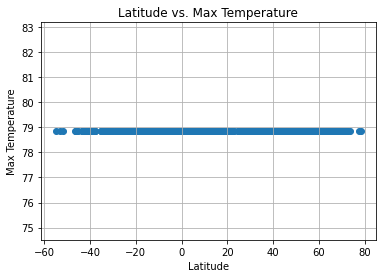

In [40]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"Latitude vs. Max Temperature")

plt.savefig("../Output/Lat_vs_temp")
plt.show()


## Latitude vs. Humidity Plot

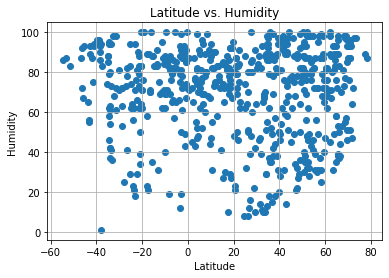

In [41]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs. Humidity")

plt.savefig("../Output/Lat_vs_humidity")
plt.show()

## Latitude vs. Cloudiness Plot

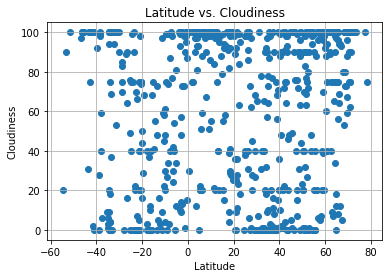

In [42]:
plt.scatter(city_data_df["Lat"], city_data_df["Clouds"], marker = "o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs. Cloudiness")

plt.savefig("../Output/Lat_vs_cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

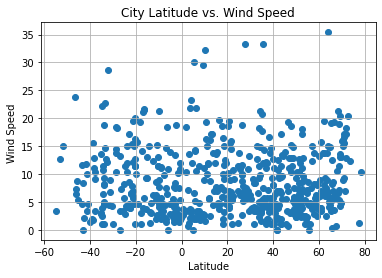

In [39]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed ")
plt.title(f"Latitude vs. Wind Speed")

plt.savefig("../Output/Lat_vs_windspeed")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression